In [2]:
import os

import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
tqdm.pandas()

import warnings
warnings.filterwarnings("ignore")

In [3]:
%%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

# 1. Importation des données et construction d'une seule base

In [4]:
auto = pd.read_json(r'C:\Users\Bastien\Desktop\Data - Rapport\0. Base de données\data_amazon_json\Automotive_5.json',lines=True)
cell = pd.read_json(r'C:\Users\Bastien\Desktop\Data - Rapport\0. Base de données\data_amazon_json\Cell_Phones_and_Accessories_5.json',lines=True)
clothes = pd.read_json(r'C:\Users\Bastien\Desktop\Data - Rapport\0. Base de données\data_amazon_json\Clothing_Shoes_and_Jewelry_5.json',lines=True)
sports = pd.read_json(r'C:\Users\Bastien\Desktop\Data - Rapport\0. Base de données\data_amazon_json\Sports_and_Outdoors_5.json',lines=True)
tools = pd.read_json(r'C:\Users\Bastien\Desktop\Data - Rapport\0. Base de données\data_amazon_json\Tools_and_Home_Improvement_5.json',lines=True)

In [5]:
auto = auto.loc[:,['overall', 'reviewText']]
cell = cell.loc[:,['overall', 'reviewText']]
clothes = clothes.loc[:,['overall', 'reviewText']]
sports = sports.loc[:,['overall', 'reviewText']]
tools = tools.loc[:,['overall', 'reviewText']]

In [6]:
auto['Category'] = 'Automotive'
cell['Category'] = 'Cell Phones and Accessories'
clothes['Category'] = 'Clothing SHoes and Jewelry'
sports['Category'] = 'Sports and Outdoor'
tools['Category'] = 'Tools and Home Improvements'

In [7]:
reviews = pd.concat([auto,cell,clothes,sports,tools],axis=0)

In [8]:
reviews.reset_index(drop = True, inplace = True)

In [9]:
reviews['Positivité'] = reviews['overall']

In [10]:
del reviews['overall']

# 2. Explanatory Data Analysis

## 2.1. General information

In [11]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924402 entries, 0 to 924401
Data columns (total 3 columns):
reviewText    924402 non-null object
Category      924402 non-null object
Positivité    924402 non-null int64
dtypes: int64(1), object(2)
memory usage: 21.2+ MB


## 2.2. Distribution of positivity

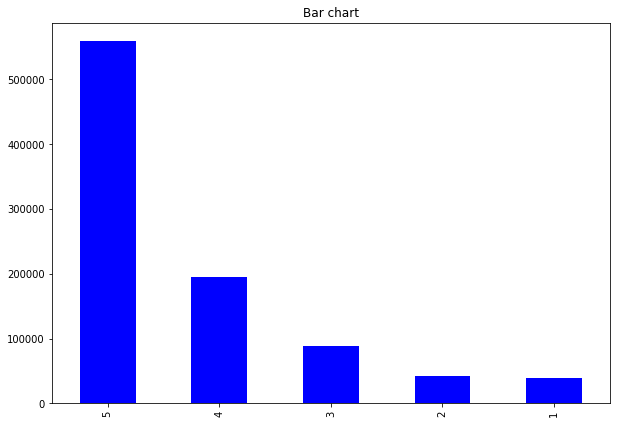

In [17]:
ax, fig = plt.subplots(figsize=(10, 7))
classes = reviews['Positivité'].value_counts()
classes.plot(kind= 'bar', color= ["blue", "blue",'blue','blue','blue'])
plt.title('Bar chart')
plt.show()

In [13]:
reviews['Positivité'].value_counts()

5    559306
4    195462
3     88134
2     42299
1     39201
Name: Positivité, dtype: int64

In [14]:
somme_5 = sum(reviews['Positivité'] == 5)
somme_4 = sum(reviews['Positivité'] == 4)
somme_3 = sum(reviews['Positivité'] == 3)
somme_2 = sum(reviews['Positivité'] == 2)
somme_1 = sum(reviews['Positivité'] == 1)

percent_5 = (sum(reviews['Positivité'] == 5) / len(reviews['Positivité'])) * 100
percent_4 = (sum(reviews['Positivité'] == 4) / len(reviews['Positivité'])) * 100
percent_3 = (sum(reviews['Positivité'] == 3) / len(reviews['Positivité'])) * 100
percent_2 = (sum(reviews['Positivité'] == 2) / len(reviews['Positivité'])) * 100
percent_1 = (sum(reviews['Positivité'] == 1) / len(reviews['Positivité'])) * 100


table = [["Sum",somme_5,somme_4,somme_3,somme_2,somme_1],
         ["Percent",percent_5,percent_4,percent_3,percent_2,percent_1]]
table = pd.DataFrame(table, columns = ["Type","5 Rated Reviews","4 Rated Reviews","3 Rated Reviews","2 Rated Reviews","1 Rated Reviews"]) 
table

,Type,5 Rated Reviews,4 Rated Reviews,3 Rated Reviews,2 Rated Reviews,1 Rated Reviews
0,Sum,559306.000000,195462.000000,88134.000000,42299.000000,39201.000000
1,Percent,60.504629,21.144697,9.534164,4.575823,4.240687


## 2.2. Distribution of category

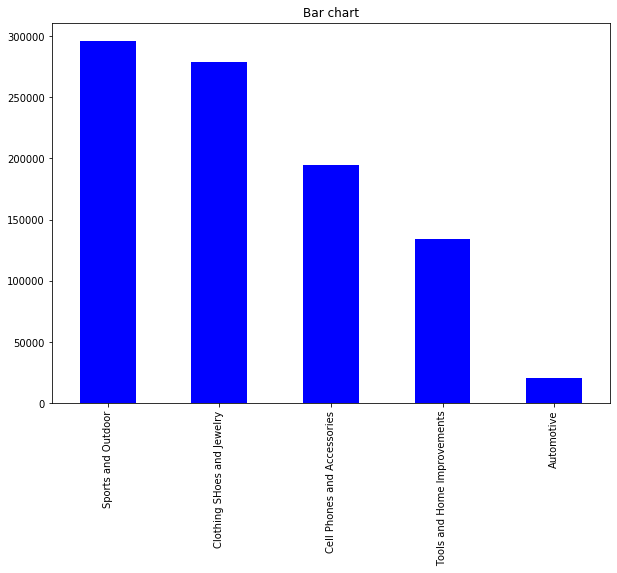

In [16]:
ax, fig = plt.subplots(figsize=(10, 7))
classes = reviews['Category'].value_counts()
classes.plot(kind= 'bar', color= ["blue", "blue",'blue','blue','blue'])
plt.title('Bar chart')
plt.show()

In [18]:
somme_auto = sum(reviews['Category'] == 'Automotive')
somme_cell = sum(reviews['Category'] == 'Cell Phones and Accessories')
somme_clothes = sum(reviews['Category'] == 'Clothing SHoes and Jewelry')
somme_sports = sum(reviews['Category'] == 'Sports and Outdoor')
somme_tools = sum(reviews['Category'] == 'Tools and Home Improvements')

total = len(reviews['Category'])

percent_auto = (somme_auto/ total) * 100
percent_cell = (somme_cell/ total) * 100
percent_clothes = (somme_clothes/ total) * 100
percent_sports = (somme_sports/ total) * 100
percent_tools = (somme_tools/ total) * 100


table = [["Sum",somme_auto,somme_cell,somme_clothes,somme_sports,somme_tools],
         ["Percent",percent_auto,percent_cell,percent_clothes,percent_sports,percent_tools]]
table = pd.DataFrame(table, columns = ["Type",'Automotive',"Cell Phones and Accessories",'Clothing SHoes and Jewelry',
                                       'Sports and Outdoor','Tools and Home Improvements']) 
table

,Type,Automotive,Cell Phones and Accessories,Clothing SHoes and Jewelry,Sports and Outdoor,Tools and Home Improvements
0,Sum,20473.000000,194439.000000,278677.000000,296337.000000,134476.000000
1,Percent,2.214729,21.034031,30.146733,32.057157,14.547351


## 2.3. Summarizing table and graph

In [22]:
data = reviews.groupby(['Category','Positivité']).count()['reviewText']
data = data.groupby(level=0).apply(lambda x: 100 * x / len(reviews['reviewText']))
data

Category                     Positivité
Automotive                   1              0.058632
                             2              0.065556
                             3              0.154695
                             4              0.429142
                             5              1.506704
Cell Phones and Accessories  1              1.436496
                             2              1.196882
                             3              2.319229
                             4              4.326365
                             5             11.755059
Clothing SHoes and Jewelry   1              1.210729
                             2              1.672757
                             3              3.291317
                             4              6.312946
                             5             17.658984
Sports and Outdoor           1              0.978470
                             2              1.103849
                             3              2.603954
      

Text(0.5, 1.0, 'Bar chart')

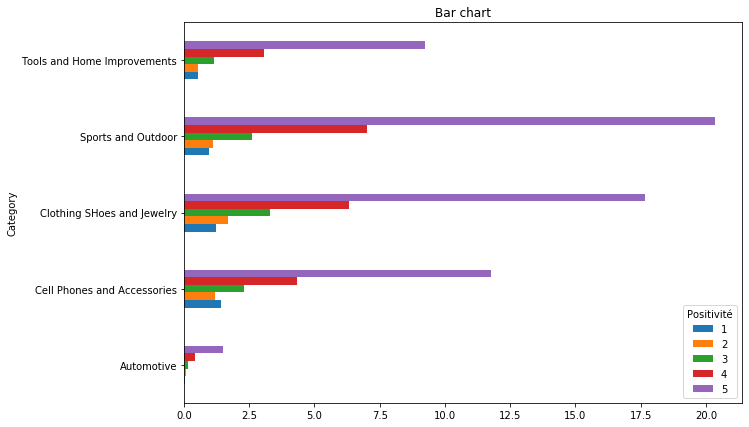

In [23]:
data.unstack().plot.barh(figsize=(10, 7))
plt.title('Bar chart')

# 3. Balancing Data Set 

## 3.1. Balancing according to the target (positivity)

In [24]:
import random
def shuffle(df):
    index = list(df.index)
    random.shuffle(index)
    df = df.loc[index]
    df.reset_index()
    return df

In [25]:
def balance(df) :
    df_final = pd.DataFrame()  
    for pos in df['Positivité'].unique():
        reviews_pos = df[df['Positivité']==pos]                    
        reviews_pos_shuffled = shuffle(reviews_pos)
        reviews_pos_shuffled = reviews_pos_shuffled[0:min(df['Positivité'].value_counts())]
        df_final = df_final.append(reviews_pos_shuffled,ignore_index=True)
    df_final.reset_index(drop = True, inplace = True)     
    return df_final

In [26]:
reviews_balanced = balance(reviews)

In [27]:
reviews_balanced.count()

reviewText    196005
Category      196005
Positivité    196005
dtype: int64

## 3.2. EDA

### 3.2.1. Positivity

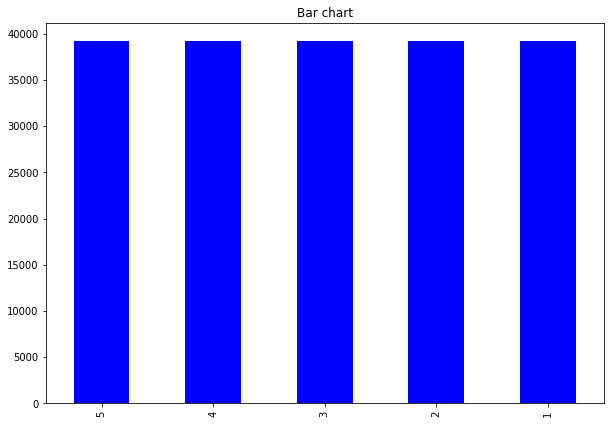

In [28]:
ax, fig = plt.subplots(figsize=(10, 7))
classes = reviews_balanced['Positivité'].value_counts()
classes.plot(kind= 'bar', color= ["blue", "blue",'blue','blue','blue'])
plt.title('Bar chart')
plt.show()

In [29]:
reviews_balanced['Positivité'].value_counts()

5    39201
4    39201
3    39201
2    39201
1    39201
Name: Positivité, dtype: int64

In [30]:
somme_5 = sum(reviews_balanced['Positivité'] == 5)
somme_4 = sum(reviews_balanced['Positivité'] == 4)
somme_3 = sum(reviews_balanced['Positivité'] == 3)
somme_2 = sum(reviews_balanced['Positivité'] == 2)
somme_1 = sum(reviews_balanced['Positivité'] == 1)

percent_5 = (sum(reviews_balanced['Positivité'] == 5) / len(reviews_balanced['Positivité'])) * 100
percent_4 = (sum(reviews_balanced['Positivité'] == 4) / len(reviews_balanced['Positivité'])) * 100
percent_3 = (sum(reviews_balanced['Positivité'] == 3) / len(reviews_balanced['Positivité'])) * 100
percent_2 = (sum(reviews_balanced['Positivité'] == 2) / len(reviews_balanced['Positivité'])) * 100
percent_1 = (sum(reviews_balanced['Positivité'] == 1) / len(reviews_balanced['Positivité'])) * 100


table = [["Sum",somme_5,somme_4,somme_3,somme_2,somme_1],
         ["Percent",percent_5,percent_4,percent_3,percent_2,percent_1]]
table = pd.DataFrame(table, columns = ["Type","5 Rated Reviews","4 Rated Reviews","3 Rated Reviews","2 Rated Reviews","1 Rated Reviews"]) 
table

,Type,5 Rated Reviews,4 Rated Reviews,3 Rated Reviews,2 Rated Reviews,1 Rated Reviews
0,Sum,39201.0,39201.0,39201.0,39201.0,39201.0
1,Percent,20.0,20.0,20.0,20.0,20.0


### 3.2.1. Category

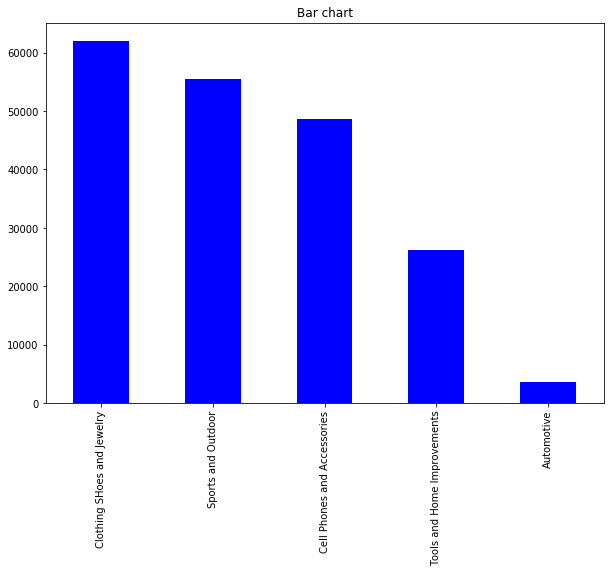

In [31]:
ax, fig = plt.subplots(figsize=(10, 7))
classes = reviews_balanced['Category'].value_counts()
classes.plot(kind= 'bar', color= ["blue", "blue",'blue','blue','blue'])
plt.title('Bar chart')
plt.show()

In [32]:
somme_auto = sum(reviews_balanced['Category'] == 'Automotive')
somme_cell = sum(reviews_balanced['Category'] == 'Cell Phones and Accessories')
somme_clothes = sum(reviews_balanced['Category'] == 'Clothing SHoes and Jewelry')
somme_sports = sum(reviews_balanced['Category'] == 'Sports and Outdoor')
somme_tools = sum(reviews_balanced['Category'] == 'Tools and Home Improvements')

total = len(reviews_balanced['Category'])

percent_auto = (somme_auto/ total) * 100
percent_cell = (somme_cell/ total) * 100
percent_clothes = (somme_clothes/ total) * 100
percent_sports = (somme_sports/ total) * 100
percent_tools = (somme_tools/ total) * 100


table = [["Sum",somme_auto,somme_cell,somme_clothes,somme_sports,somme_tools],
         ["Percent",percent_auto,percent_cell,percent_clothes,percent_sports,percent_tools]]
table = pd.DataFrame(table, columns = ["Type",'Automotive',"Cell Phones and Accessories",'Clothing SHoes and Jewelry',
                                       'Sports and Outdoor','Tools and Home Improvements']) 
table

,Type,Automotive,Cell Phones and Accessories,Clothing SHoes and Jewelry,Sports and Outdoor,Tools and Home Improvements
0,Sum,3570.000000,48673.00000,62062.000000,55534.000000,26166.000000
1,Percent,1.821382,24.83253,31.663478,28.332951,13.349659


### 3.2.3. Summary

In [33]:
data = reviews_balanced.groupby(['Category','Positivité']).count()['reviewText']
data = data.groupby(level=0).apply(lambda x: 100 * x / len(reviews_balanced['reviewText']))
data

Category                     Positivité
Automotive                   1             0.276524
                             2             0.286217
                             3             0.326012
                             4             0.394888
                             5             0.537741
Cell Phones and Accessories  1             6.774827
                             2             5.232009
                             3             4.863651
                             4             4.087141
                             5             3.874901
Clothing SHoes and Jewelry   1             5.710058
                             2             7.306446
                             3             6.886559
                             4             5.977399
                             5             5.783016
Sports and Outdoor           1             4.614678
                             2             4.828958
                             3             5.508023
                        

Text(0.5, 1.0, 'Bar chart')

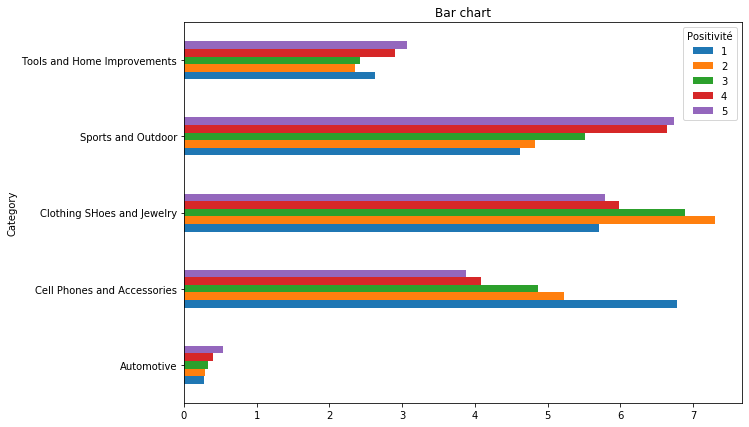

In [34]:
data.unstack().plot.barh(figsize=(10, 7))
plt.title('Bar chart')

# 4. Explanatory Data Analysis

## 4.1. Distribution de la longueur des commentaires en fonction de la positivité

### 4.1.1. Statistiques descriptives classiques longueur des commentaires (en nombre de mots)

In [35]:
longueur = reviews_balanced['reviewText'].apply(lambda x: len(str(x).split(' ')))

In [36]:
longueur.describe()

count    196005.000000
mean         89.220683
std         111.978698
min           1.000000
25%          31.000000
50%          54.000000
75%         103.000000
max        5974.000000
Name: reviewText, dtype: float64

### 4.1.2. Statistiques descriptives classiques longueur des commentaires par positivité (en nombre de mots)

In [37]:
len_5 = reviews_balanced[reviews_balanced['Positivité']==5]['reviewText'].progress_apply(lambda x: len(str(x).split(' ')))
len_4 = reviews_balanced[reviews_balanced['Positivité']==4]['reviewText'].progress_apply(lambda x: len(str(x).split(' ')))
len_3 = reviews_balanced[reviews_balanced['Positivité']==3]['reviewText'].progress_apply(lambda x: len(str(x).split(' ')))
len_2 = reviews_balanced[reviews_balanced['Positivité']==2]['reviewText'].progress_apply(lambda x: len(str(x).split(' ')))
len_1 = reviews_balanced[reviews_balanced['Positivité']==1]['reviewText'].progress_apply(lambda x: len(str(x).split(' ')))

In [38]:
len_5.describe()

count    39201.000000
mean        77.836101
std        104.689515
min          1.000000
25%         28.000000
50%         46.000000
75%         87.000000
max       5974.000000
Name: reviewText, dtype: float64

In [39]:
len_4.describe()

count    39201.000000
mean        97.627305
std        123.204730
min          1.000000
25%         33.000000
50%         58.000000
75%        113.000000
max       3517.000000
Name: reviewText, dtype: float64

In [40]:
len_3.describe()

count    39201.000000
mean        92.052881
std        116.139056
min          1.000000
25%         32.000000
50%         56.000000
75%        105.000000
max       3926.000000
Name: reviewText, dtype: float64

In [41]:
len_2.describe()

count    39201.000000
mean        93.387158
std        110.667158
min          1.000000
25%         34.000000
50%         59.000000
75%        110.000000
max       2796.000000
Name: reviewText, dtype: float64

In [42]:
len_1.describe()

count    39201.000000
mean        85.199969
std        102.862966
min          1.000000
25%         31.000000
50%         54.000000
75%        100.000000
max       3548.000000
Name: reviewText, dtype: float64

(-100, 750)

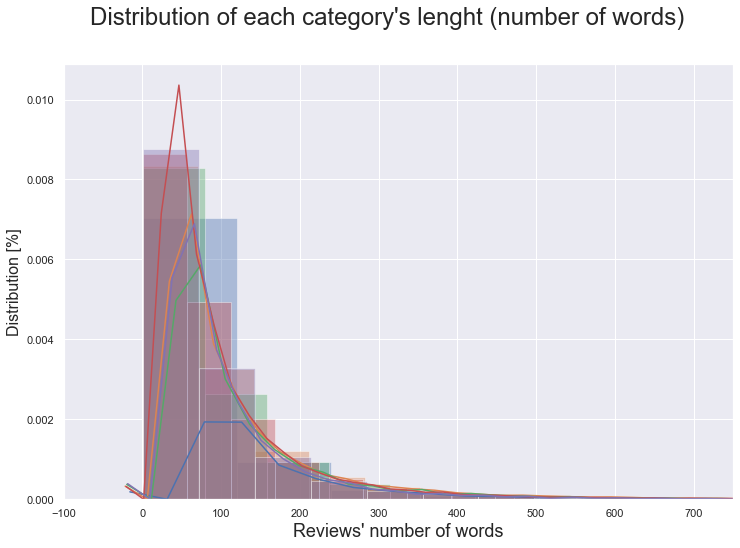

In [43]:
sns.set(rc={'figure.figsize':(12,8)})
fig = sns.distplot(len_5, hist=True, label="5-Rated")
fig = sns.distplot(len_4, hist=True, label="4-Rated")
fig = sns.distplot(len_3, hist=True, label="3-Rated")
fig = sns.distplot(len_2, hist=True, label="2-Rated")
fig = sns.distplot(len_1, hist=True, label="1-Rated");

fig.figure.suptitle("Distribution of each category's lenght (number of words)", fontsize = 24)

plt.ylabel('Distribution [%]', fontsize=16)
plt.xlabel("Reviews' number of words", fontsize=18)
plt.xlim(-100, 750)

## Enregistrement du document

In [45]:
reviews_balanced.to_csv(r'C:\Users\Bastien\Desktop\Data - Rapport\0. Base de données\1. Saved versions\amazon_reviews_balanced.csv',sep=',')